# Load Data

In [1]:
from sklearn.datasets import load_iris

iris = load_iris()

X = iris.data
y = iris.target

print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


model_selection 모듈

In [2]:
from sklearn.model_selection import train_test_split

X_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state = 121,
    stratify=y # 클래스의 비율 만큼 분할 수행
)

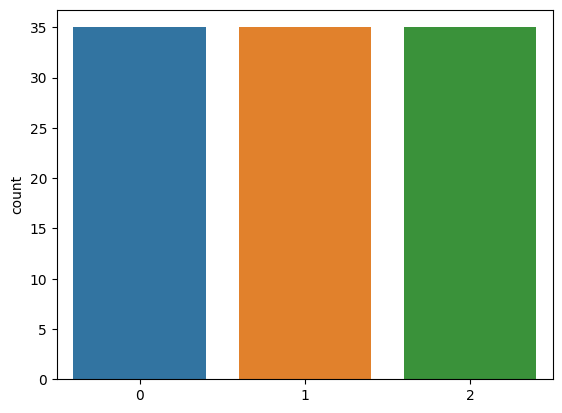

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=y_train)
plt.show()

# K-Fold, Stratified K-Fold

k-fold

In [4]:
from sklearn.model_selection import KFold
import numpy as np

In [7]:
kfold = KFold(n_splits = 3)

#KFold 객체 .split() : 폴드 별 학습,검증 테스트의 인덱스를 array로 반환
#splited = kfold.split(X)
#next(splited)

for train_indices, valid_indices in kfold.split(X):
  print("valid : {} ".format(valid_indices)) #검증세트의 인덱스
  print("train : {} ".format(train_indices)) #훈련세트의 인덱스

valid : [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49] 
train : [ 50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67
  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85
  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103
 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121
 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139
 140 141 142 143 144 145 146 147 148 149] 
valid : [50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73
 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97
 98 99] 
train : [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49 100 101 102 103
 104 105 106 107 108 109 110 11

교차 검증 수행
- 각 폴드 마다의 훈련 세트를 위한 인덱스를 활용해 훈련데이터로 사용
- 검증 세트를 위한 인덱스를 활용해 검증 데이터로 사용
- 각 훈련, 검증의 결과를 저장했다가 최종적으로 훈련이 끝나면 평균

In [8]:
n_iter = 0
cv_accuracy = [] #각 폴드에서의 정확도를 담을 배열

kfold = KFold(n_splits=3)

for train_indices, valid_indices in kfold.split(X):
  #반환된 인덱스를 이용해 학습용,검증용 데이터 추출
  X_train, X_valid = X[train_indices], X[valid_indices]
  y_train, y_valid = y[train_indices], y[valid_indices]

  #모델 생성 및 훈련
  from sklearn.tree import DecisionTreeClassifier
  dt_clf = DecisionTreeClassifier().fit(X_train, y_train)

  #예측
  pred = dt_clf.predict(X_valid)

  #평가
  from sklearn.metrics import accuracy_score
  acc = accuracy_score(y_valid, pred)

  #해당 폴드의 평가 결과를 배열에 저장
  cv_accuracy.append(acc)

  n_iter += 1
  print("{} 번째 폴드에 대한 평가 결과 : {:.4f}".format(n_iter, acc))

print()
print("최종 결과: {}".format(np.mean(cv_accuracy)))

1 번째 폴드에 대한 평가 결과 : 0.0000
2 번째 폴드에 대한 평가 결과 : 0.0000
3 번째 폴드에 대한 평가 결과 : 0.0000

최종 결과: 0.0


stratified K Fold

In [11]:
from sklearn.model_selection import StratifiedKFold

skfold = StratifiedKFold(n_splits = 3)

for train_indices, valid_indices in skfold.split(X, y): #클래스의 비율대로 자름 -> lable도 같이 들어감
  print("valid : {} ".format(valid_indices))
  print("train : {} ".format(train_indices)) 
  print()

  class_, counts = np.unique(y[valid_indices], return_counts=True)
classes = dict(zip(class_, counts))
print("클래스 0 : {}개 / 클래스 1 : {}개 / 클래스 2 : {}개".format(classes[0], classes[1], classes[2]))
print("="*50)
print()

valid : [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  50
  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115] 
train : [ 17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34
  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  67  68  69
  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87
  88  89  90  91  92  93  94  95  96  97  98  99 116 117 118 119 120 121
 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139
 140 141 142 143 144 145 146 147 148 149] 

valid : [ 17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  67
  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82 116 117 118
 119 120 121 122 123 124 125 126 127 128 129 130 131 132] 
train : [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  34
  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52
  5

stratified K Fold 교차검증

In [12]:
n_iter = 0
cv_accuracy = [] #각 폴드에서의 정확도를 담을 배열

skfold = StratifiedKFold(n_splits=3)

for train_indices, valid_indices in skfold.split(X,y):
  #반환된 인덱스를 이용해 학습용,검증용 데이터 추출
  X_train, X_valid = X[train_indices], X[valid_indices]
  y_train, y_valid = y[train_indices], y[valid_indices]

  #모델 생성 및 훈련
  from sklearn.tree import DecisionTreeClassifier
  dt_clf = DecisionTreeClassifier().fit(X_train, y_train)

  #예측
  pred = dt_clf.predict(X_valid)

  #평가
  from sklearn.metrics import accuracy_score
  acc = accuracy_score(y_valid, pred)

  #해당 폴드의 평가 결과를 배열에 저장
  cv_accuracy.append(acc)

  n_iter += 1
  print("{} 번째 폴드에 대한 평가 결과 : {:.4f}".format(n_iter, acc))

print()
print("최종 결과: {}".format(np.mean(cv_accuracy)))

1 번째 폴드에 대한 평가 결과 : 0.9800
2 번째 폴드에 대한 평가 결과 : 0.9200
3 번째 폴드에 대한 평가 결과 : 1.0000

최종 결과: 0.9666666666666667


# cross_val_score

In [14]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(
    DecisionTreeClassifier(), # Classifier가 들어가면 자동으로 Stratified K Fold를 사용
    X, y,
    scoring = 'accuracy',
    cv = 3 
)

print("폴드 별 정확도 확인: {}".format(scores))
print("평균 정확도 확인 : {}".format(np.mean(scores)))

폴드 별 정확도 확인: [0.98 0.92 0.98]
평균 정확도 확인 : 0.96


# GridSearchCV를 이용한 하이퍼 파라미터 튜닝 & 교차검증

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=121)

In [16]:
# GridSearch를 수행할 하이퍼 파라미터를 딕셔너리로 설정
# key: 하이퍼 파라미터의 이름(변수명)
# value: 하이퍼 파라미터에 들어갈 값의 목록(리스트)

parameters = {
    "max_depth":[1,2,3],
    "min_samples_split":[2,3]
}

In [17]:
from sklearn.model_selection import GridSearchCV

grid_dt_clf = GridSearchCV(DecisionTreeClassifier(), 
                           param_grid = parameters, 
                           return_train_score = True, #훈련 세트에 대한 평가 점수도 같이 받게 해주는 옵션
                           n_jobs = -1, #사용 가능한 cpu코어를 모두 사용해서 훈련에 투입
                           cv = 3 #각 하이퍼 파라미터 조합으로 만드는 모델에서 사용할 폴드의 개수
                           )

#총 만들어진 모델의 개수 : 6*3 = 18개 

In [18]:
grid_dt_clf.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3], 'min_samples_split': [2, 3]},
             return_train_score=True)

In [19]:
grid_dt_clf.cv_results_

{'mean_fit_time': array([0.00323025, 0.0011669 , 0.00114592, 0.0011131 , 0.00544381,
        0.00234437]),
 'std_fit_time': array([2.46689554e-03, 8.48558783e-05, 2.76656885e-05, 4.97544533e-05,
        5.97912072e-03, 1.82043375e-03]),
 'mean_score_time': array([0.00409142, 0.00086848, 0.00079775, 0.00251579, 0.00088398,
        0.0038929 ]),
 'std_score_time': array([4.25735504e-03, 3.94203009e-05, 3.27777136e-05, 2.39614759e-03,
        5.95370015e-05, 4.23687340e-03]),
 'param_max_depth': masked_array(data=[1, 1, 2, 2, 3, 3],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_min_samples_split': masked_array(data=[2, 3, 2, 3, 2, 3],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 1, 'min_samples_split': 2},
  {'max_depth': 1, 'min_samples_split': 3},
  {'max_depth': 2, 'min_samples_split': 2},
  {'max_depth': 2, 'min_sa

In [21]:
#최적 하이퍼파라미터
grid_dt_clf.best_params_

{'max_depth': 3, 'min_samples_split': 2}

In [23]:
# 최고 정확도
print("{:.4f}".format(grid_dt_clf.best_score_))

0.9333


In [24]:
#최고 결과를 냈었던 추정기(Estimator)로 예측
pred = grid_dt_clf.predict(X_test)

#테스트 세트의 정확도
accuracy_score(y_test, pred)

0.9666666666666667

In [25]:
best_dt_clf = grid_dt_clf.best_estimator_
best_dt_clf

DecisionTreeClassifier(max_depth=3)

In [26]:
pred = best_dt_clf.predict(X_test)
accuracy_score(y_test, pred)

0.9666666666666667